In [1]:
import xml.etree.ElementTree as ET
import numpy as np
import os

In [2]:

tree = ET.iterparse('data/denmark-latest.xml')



In [3]:

with open('preprocessing_v1.txt', 'w') as f:
    
    tree = ET.iterparse('data/denmark-latest.xml', events = ('start', 'end'))
    for event, child in tree:

        if event == 'start':
            if child.tag == 'way':
                child_attributes = child.attrib
                child_id = child_attributes['id']
                
                #tags = [grandchild.attrib for grandchild in child if grandchild.tag == 'tag']
                hw = [grandchild.attrib['k'] == 'highway' for grandchild in child if grandchild.tag == 'tag']
                nds = [grandchild.attrib['ref'] for grandchild in child if grandchild.tag == 'nd']
                #print(hw,'\n')
                
                if any(hw) == True:
                    f.write(f'{child_id}:{nds}\n')
        if event == 'end':
            child.clear()


            
        

In [5]:
# get the node IDs of the nodes referenced in highways

with open('nodesInWays.txt', 'w') as f:
    
    tree = ET.iterparse('data/malta-latest.xml', events = ('start', 'end'))
    for event, child in tree:

        if event == 'start':
            if child.tag == 'way':

                hw = [grandchild.attrib['k'] == 'highway' for grandchild in child if grandchild.tag == 'tag']
                nds = [grandchild.attrib['ref'] for grandchild in child if grandchild.tag == 'nd']

                
                if any(hw) == True:
                    for nd in nds:
                        f.write(f'{nd}\n')
                        
        if event == 'end':
            child.clear()


os.system('cmd /c SORT nodesInWays.txt /unique /o nodesInWaysSorted.txt')

0

In [ ]:
# uden binary search - tager ca. 12 min for malta - DVS SKRALD!!
f = open('nodesInWaysSorted.txt', 'r')
list = f.read().splitlines()
f.close()

# find de nodes vi gerne vil have samt deres (lat, lon)

with open('nodes.txt', 'w') as f:
    
    tree = ET.iterparse('data/malta-latest.xml', events = ('start', 'end'))
    for event, child in tree:

        if event == 'start' and child.tag == 'node':
            
            if child.attrib['id'] in list:    

                nodeID = child.attrib['id']
                lat = child.attrib['lat']
                lon = child.attrib['lon']

                f.write(f'{nodeID}{lat,lon}\n')
                        
        if event == 'end':
            child.clear()

In [9]:
# Med binary search - tager ca 5 sec for malta
f = open('nodesInWaysSorted.txt', 'r')
list = f.read().splitlines()
f.close()

from bisect import bisect_left
 
def BinarySearch(a, x):
    i = bisect_left(a, x)
    if i != len(a) and a[i] == x:
        return True
    else:
        return False
 
# find de nodes vi gerne vil have samt deres (lat, lon)

with open('nodes.txt', 'w') as f:
    
    tree = ET.iterparse('data/malta-latest.xml', events = ('start', 'end'))
    for event, child in tree:

        if event == 'start':
            
            if child.tag == 'node':

                if BinarySearch(list,child.attrib['id']):    

                    nodeID = child.attrib['id']
                    lat = child.attrib['lat']
                    lon = child.attrib['lon']

                    f.write(f'{nodeID},{lat},{lon}\n')
                        
        if event == 'end':
            child.clear()

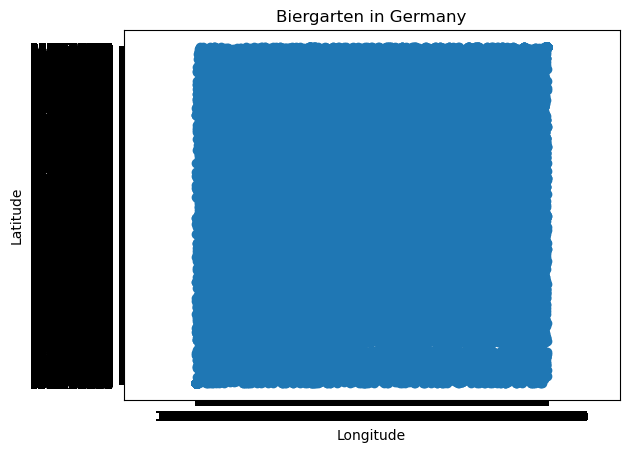

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Collect coords into list
coords = []
for child in root:
  tag = child.tag
  
  
  if tag == 'node':
    attributes = child.attrib

    lon = attributes['lon']
    lat = attributes['lat']
    coords.append((lon, lat))
    
    
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Biergarten in Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

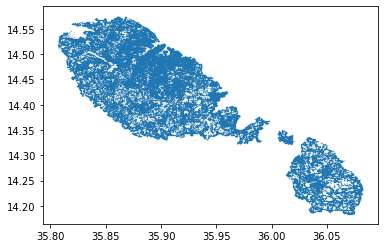

In [29]:
import numpy as np
import matplotlib.pyplot as plt
coords = []
with open('nodes.txt', 'r') as nodes:

    for line in nodes:
        list = [float(i) for i in line.split(sep=",")]
        coords.append(list[1:])


X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o', markersize=0.1)

In [20]:
f = open('nodes.txt', 'r')
list = f.read().splitlines()
f.close()
a = list[0]
a = a.split(sep=",")
for i in a:
    print(float(i))

197798.0
36.0239384
14.2884479


In [14]:
a = [1,2,3]
a[1:]

[2, 3]